In [1]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import layers

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
lb = LabelBinarizer()

import matplotlib.pyplot as plt
import random
import os
import numpy as np
np.set_printoptions(threshold=10000)
import cv2
import pickle

# 遍历所有文件名
def findAllFile(base):
    for root, ds, fs in os.walk(base):
        for f in fs:
            yield f

# 数据切分
def split_train(data,label,test_ratio):
    np.random.seed(43)
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data[train_indices],data[test_indices],label[train_indices],label[test_indices]

image_dir = ("./train/cats/", "./train/dogs/", "./train/panda/")
image_path = []
data = []
labels = []

# 1、数据预处理
# 读取图像路径
for path in image_dir:
    for i in findAllFile(path):
        image_path.append(path+i)

# 随机化数据
random.seed(43)
random.shuffle(image_path)

# 读取图像数据，读取label文件名数据
for j in image_path:
    image = cv2.imread(j)
    image = cv2.resize(image,(32,32)).flatten()
    data.append(image)
    label = j.split("/")[-2]
    labels.append(label)

# 规格化数据
data = np.array(data,dtype="float") / 255.0
labels = np.array(labels)
# 数据切分
(trainX,testX,trainY,testY) = split_train(data,labels,test_ratio=0.25)
# 将cat、dog、panda规格化数据
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

# 最终数据结果
print(trainX)
print(data)
print(data.shape) # (3000, 3072)，32x32x3=3072，其图片3通道被拉长成一条操作
print(lb.classes_) # ['cats' 'dogs' 'panda']

[[0.44705882 0.48235294 0.50980392 ... 0.05098039 0.0745098  0.07058824]
 [0.34901961 0.3372549  0.2627451  ... 0.64313725 0.6627451  0.62352941]
 [0.77254902 0.85490196 0.84313725 ... 0.17254902 0.12941176 0.18431373]
 ...
 [0.30588235 0.31764706 0.18823529 ... 0.38823529 0.49803922 0.39607843]
 [0.92156863 0.99215686 0.99607843 ... 0.08627451 0.22745098 0.35686275]
 [0.18823529 0.14117647 0.13333333 ... 0.83137255 0.81960784 0.80392157]]
[[0.80784314 0.80392157 0.74901961 ... 0.56862745 0.55686275 0.56862745]
 [0.64705882 0.82352941 0.87843137 ... 0.54117647 0.50980392 0.52156863]
 [0.17647059 0.23921569 0.2745098  ... 0.00784314 0.05882353 0.0627451 ]
 ...
 [0.00784314 0.04705882 0.00784314 ... 0.17647059 0.43137255 0.21960784]
 [0.50588235 0.54509804 0.61568627 ... 0.69019608 0.71372549 0.76470588]
 [0.94901961 0.94901961 0.94901961 ... 0.40784314 0.44705882 0.4627451 ]]
(3000, 3072)
['cats' 'dogs' 'panda']


In [20]:
# 2、创建模型层
EPOCHS = 200
model = Sequential()
model.add(Dense(512,input_shape=(3072,),activation="relu",kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model.add(Dropout(0.5))
model.add(Dense(256,activation="relu",kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
model.add(Dropout(0.5))
model.add(Dense(len(lb.classes_),activation="softmax",kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))
# 损失函数和优化器，正则惩罚
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.001),metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=EPOCHS, batch_size=32)

Epoch 1/200


G:\ai\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


71/71 [==============================] - 1s 8ms/step - loss: 1.2348 - accuracy: 0.3427 - val_loss: 1.0840 - val_accuracy: 0.3680
Epoch 2/200
71/71 [==============================] - 0s 7ms/step - loss: 1.2319 - accuracy: 0.3338 - val_loss: 1.0668 - val_accuracy: 0.3893
Epoch 3/200
71/71 [==============================] - 0s 6ms/step - loss: 1.1753 - accuracy: 0.3618 - val_loss: 1.0524 - val_accuracy: 0.3893
Epoch 4/200
71/71 [==============================] - 0s 6ms/step - loss: 1.1414 - accuracy: 0.3822 - val_loss: 1.0390 - val_accuracy: 0.4547
Epoch 5/200
71/71 [==============================] - 0s 6ms/step - loss: 1.1279 - accuracy: 0.3916 - val_loss: 1.0306 - val_accuracy: 0.4680
Epoch 6/200
71/71 [==============================] - 0s 6ms/step - loss: 1.0821 - accuracy: 0.4129 - val_loss: 1.0234 - val_accuracy: 0.4613
Epoch 7/200
71/71 [==============================] - 0s 6ms/step - loss: 1.0857 - accuracy: 0.3991 - val_loss: 1.0143 - val_accuracy: 0.4867
Epoch 8/200
71/71 [======

Epoch 59/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8531 - accuracy: 0.5800 - val_loss: 0.8860 - val_accuracy: 0.5600
Epoch 60/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8688 - accuracy: 0.5587 - val_loss: 0.8910 - val_accuracy: 0.5480
Epoch 61/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8506 - accuracy: 0.5760 - val_loss: 0.8902 - val_accuracy: 0.5493
Epoch 62/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8516 - accuracy: 0.5836 - val_loss: 0.8848 - val_accuracy: 0.5573
Epoch 63/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8514 - accuracy: 0.5720 - val_loss: 0.8812 - val_accuracy: 0.5600
Epoch 64/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8457 - accuracy: 0.5644 - val_loss: 0.8844 - val_accuracy: 0.5573
Epoch 65/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8530 - accuracy: 0.5698 - val_loss: 0.8879 - val_accuracy: 0.5560
Epoch 

71/71 [==============================] - 0s 6ms/step - loss: 0.8082 - accuracy: 0.5996 - val_loss: 0.8551 - val_accuracy: 0.5800
Epoch 117/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8001 - accuracy: 0.6040 - val_loss: 0.8552 - val_accuracy: 0.5813
Epoch 118/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7965 - accuracy: 0.6004 - val_loss: 0.8527 - val_accuracy: 0.5827
Epoch 119/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7940 - accuracy: 0.5938 - val_loss: 0.8526 - val_accuracy: 0.5773
Epoch 120/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7945 - accuracy: 0.6022 - val_loss: 0.8576 - val_accuracy: 0.5720
Epoch 121/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7952 - accuracy: 0.5991 - val_loss: 0.8544 - val_accuracy: 0.5787
Epoch 122/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8037 - accuracy: 0.5951 - val_loss: 0.8548 - val_accuracy: 0.5773
Epoch 123/200

71/71 [==============================] - 0s 6ms/step - loss: 0.7458 - accuracy: 0.6316 - val_loss: 0.8376 - val_accuracy: 0.5800
Epoch 174/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7490 - accuracy: 0.6307 - val_loss: 0.8370 - val_accuracy: 0.5813
Epoch 175/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7391 - accuracy: 0.6378 - val_loss: 0.8379 - val_accuracy: 0.5827
Epoch 176/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7414 - accuracy: 0.6436 - val_loss: 0.8357 - val_accuracy: 0.5840
Epoch 177/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7452 - accuracy: 0.6160 - val_loss: 0.8357 - val_accuracy: 0.5853
Epoch 178/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7430 - accuracy: 0.6276 - val_loss: 0.8305 - val_accuracy: 0.5893
Epoch 179/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7360 - accuracy: 0.6258 - val_loss: 0.8369 - val_accuracy: 0.5867
Epoch 180/200

In [ ]:
# 3、模型评估
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

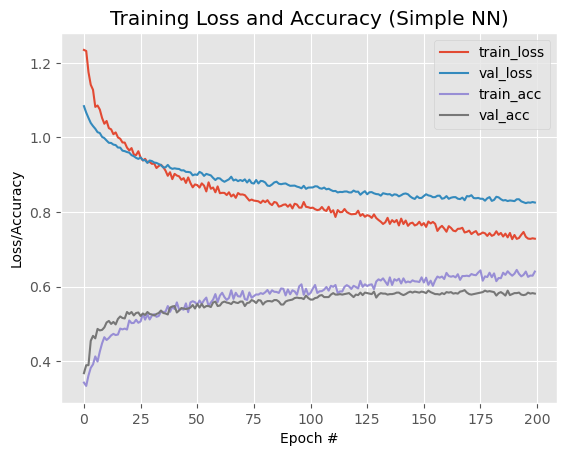

In [21]:
# 4、数据可视化
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./plot.png")

In [22]:
# 5、保存模型到本地
model.save("./model")
f = open("./label.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

INFO:tensorflow:Assets written to: ./model\assets


In [ ]:
# 6、测试模型
test_image_dir =  "./test/"
test_image_path = []
for i in findAllFile(test_image_dir):
    test_image_path.append(test_image_dir+i)
test_image = random.sample(test_image_path, 1)[0]

# 数据预处理
image = cv2.imread(test_image)
output = image.copy()
image = image.astype("float") / 255.0
image = cv2.resize(image,(32,32)).flatten()
image = image.reshape((1, image.shape[0]))

# 加载模型
model = load_model("./model")
lb = pickle.loads(open("./label.pickle", "rb").read())
# 开始预测
preds = model.predict(image)

# 查看预测结果
text1 = "{}: {:.2f}% ".format(lb.classes_[0], preds[0][0] * 100)
text2 = "{}: {:.2f}% ".format(lb.classes_[1], preds[0][1] * 100)
text3 = "{}: {:.2f}% ".format(lb.classes_[2], preds[0][2] * 100)
cv2.putText(output, text1, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
cv2.putText(output, text2, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
cv2.putText(output, text3, (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)
cv2.imshow("Image", output)
cv2.waitKey(0)

1/1 [==============================] - 0s 44ms/step
